<hr style='margin-bottom:30px;'>

<img src='la_skyline.jpg' style='float:right; width:600px; margin: 30px 30px 30px 30px;'>

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Step 0: Imports and Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',200)
pd.set_option('display.float_format','{:.2f}'.format)
plt.style.use('ggplot')
sns.set_context('notebook')
sns.set_style('darkgrid')

crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str},index_col=0, header=0,sep=',')
crimes.head()

,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
DR_NO,,,,,,,,,,,
220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [2]:
f"Rows: {crimes.shape[0]} ---- Columns: {crimes.shape[1]}"

'Rows: 185715 ---- Columns: 11'

In [3]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185715 entries, 220314085 to 230906458
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date Rptd     185715 non-null  datetime64[ns]
 1   DATE OCC      185715 non-null  datetime64[ns]
 2   TIME OCC      185715 non-null  object        
 3   AREA NAME     185715 non-null  object        
 4   Crm Cd Desc   185715 non-null  object        
 5   Vict Age      185715 non-null  int64         
 6   Vict Sex      185704 non-null  object        
 7   Vict Descent  185705 non-null  object        
 8   Weapon Desc   73502 non-null   object        
 9   Status Desc   185715 non-null  object        
 10  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 17.0+ MB


In [4]:
crimes.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 185715 entries, 220314085 to 230906458
Columns: 11 entries, Date Rptd to LOCATION
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 17.0+ MB


In [5]:
crimes.columns

Index(['Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME', 'Crm Cd Desc',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Weapon Desc', 'Status Desc',
       'LOCATION'],
      dtype='object')

In [6]:
crimes.dtypes

Date Rptd       datetime64[ns]
DATE OCC        datetime64[ns]
TIME OCC                object
AREA NAME               object
Crm Cd Desc             object
Vict Age                 int64
Vict Sex                object
Vict Descent            object
Weapon Desc             object
Status Desc             object
LOCATION                object
dtype: object

In [7]:
crimes.describe()

,Date Rptd,DATE OCC,Vict Age
count,185715,185715,185715.00
mean,2022-12-12 01:50:25.325902848,2022-11-27 19:04:55.711170560,40.00
min,2022-06-01 00:00:00,2020-01-01 00:00:00,2.00
25%,2022-09-04 00:00:00,2022-08-25 00:00:00,28.00
50%,2022-12-10 00:00:00,2022-12-02 00:00:00,37.00
75%,2023-03-20 00:00:00,2023-03-12 00:00:00,50.00
max,2023-07-03 00:00:00,2023-07-03 00:00:00,99.00
std,NaN,NaN,15.45


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Step 1: Data Preperation

- <span style='color:gold'>Renaming columns</span>
- <span style='color:gold'>Parsing dates and changing dtypes</span>
- <span style='color:gold'>Checking Null Values</span>
- <span style='color:gold'>Cleaning duplicates</span>

> Renaming Columns

In [8]:
crimes.columns = [i.upper() for i in crimes.columns]

In [9]:
crimes.columns

Index(['DATE RPTD', 'DATE OCC', 'TIME OCC', 'AREA NAME', 'CRM CD DESC',
       'VICT AGE', 'VICT SEX', 'VICT DESCENT', 'WEAPON DESC', 'STATUS DESC',
       'LOCATION'],
      dtype='object')

In [10]:
crimes.head()

,DATE RPTD,DATE OCC,TIME OCC,AREA NAME,CRM CD DESC,VICT AGE,VICT SEX,VICT DESCENT,WEAPON DESC,STATUS DESC,LOCATION
DR_NO,,,,,,,,,,,
220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [11]:
cols = [i.strip().replace(' ','_') for i in crimes.columns]

In [12]:
cols

['DATE_RPTD',
 'DATE_OCC',
 'TIME_OCC',
 'AREA_NAME',
 'CRM_CD_DESC',
 'VICT_AGE',
 'VICT_SEX',
 'VICT_DESCENT',
 'WEAPON_DESC',
 'STATUS_DESC',
 'LOCATION']

In [13]:
crimes.columns = cols

In [14]:
crimes.head()

,DATE_RPTD,DATE_OCC,TIME_OCC,AREA_NAME,CRM_CD_DESC,VICT_AGE,VICT_SEX,VICT_DESCENT,WEAPON_DESC,STATUS_DESC,LOCATION
DR_NO,,,,,,,,,,,
220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


<hr style='margin-bottom: 30px'>

> Parsing dates and changing dtypes

In [15]:
crimes.dtypes

DATE_RPTD       datetime64[ns]
DATE_OCC        datetime64[ns]
TIME_OCC                object
AREA_NAME               object
CRM_CD_DESC             object
VICT_AGE                 int64
VICT_SEX                object
VICT_DESCENT            object
WEAPON_DESC             object
STATUS_DESC             object
LOCATION                object
dtype: object

In [16]:
crimes['TIME_OCC'] = pd.to_datetime(crimes['TIME_OCC'],format='%H%M')

In [17]:
crimes.dtypes

DATE_RPTD       datetime64[ns]
DATE_OCC        datetime64[ns]
TIME_OCC        datetime64[ns]
AREA_NAME               object
CRM_CD_DESC             object
VICT_AGE                 int64
VICT_SEX                object
VICT_DESCENT            object
WEAPON_DESC             object
STATUS_DESC             object
LOCATION                object
dtype: object

In [18]:
crimes.head()

,DATE_RPTD,DATE_OCC,TIME_OCC,AREA_NAME,CRM_CD_DESC,VICT_AGE,VICT_SEX,VICT_DESCENT,WEAPON_DESC,STATUS_DESC,LOCATION
DR_NO,,,,,,,,,,,
220314085,2022-07-22,2020-05-12,1900-01-01 11:10:00,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
222013040,2022-08-06,2020-06-04,1900-01-01 16:20:00,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
220614831,2022-08-18,2020-08-17,1900-01-01 12:00:00,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
231207725,2023-02-27,2020-01-27,1900-01-01 06:35:00,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
220213256,2022-07-14,2020-07-14,1900-01-01 09:00:00,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [19]:
crimes['TIME_OCC'] = crimes['TIME_OCC'].dt.time

In [20]:
crimes.head()

,DATE_RPTD,DATE_OCC,TIME_OCC,AREA_NAME,CRM_CD_DESC,VICT_AGE,VICT_SEX,VICT_DESCENT,WEAPON_DESC,STATUS_DESC,LOCATION
DR_NO,,,,,,,,,,,
220314085,2022-07-22,2020-05-12,11:10:00,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
222013040,2022-08-06,2020-06-04,16:20:00,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
220614831,2022-08-18,2020-08-17,12:00:00,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
231207725,2023-02-27,2020-01-27,06:35:00,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
220213256,2022-07-14,2020-07-14,09:00:00,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [21]:
crimes

,DATE_RPTD,DATE_OCC,TIME_OCC,AREA_NAME,CRM_CD_DESC,VICT_AGE,VICT_SEX,VICT_DESCENT,WEAPON_DESC,STATUS_DESC,LOCATION
DR_NO,,,,,,,,,,,
220314085,2022-07-22,2020-05-12,11:10:00,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
222013040,2022-08-06,2020-06-04,16:20:00,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
220614831,2022-08-18,2020-08-17,12:00:00,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
231207725,2023-02-27,2020-01-27,06:35:00,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
220213256,2022-07-14,2020-07-14,09:00:00,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST
...,...,...,...,...,...,...,...,...,...,...,...
231510379,2023-05-29,2023-05-25,11:00:00,N Hollywood,"BUNCO, GRAND THEFT",25,M,W,NaN,Invest Cont,5300 DENNY AV
231604807,2023-01-27,2023-01-26,18:00:00,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,NaN,Invest Cont,12500 BRANFORD ST
231606525,2023-03-22,2023-03-22,10:00:00,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,12800 FILMORE ST


<hr style='margin-bottom:30px'>

> Checking Null Values

In [22]:
crimes.isna().sum()

DATE_RPTD            0
DATE_OCC             0
TIME_OCC             0
AREA_NAME            0
CRM_CD_DESC          0
VICT_AGE             0
VICT_SEX            11
VICT_DESCENT        10
WEAPON_DESC     112213
STATUS_DESC          0
LOCATION             0
dtype: int64

In [23]:
crimes.loc[crimes['VICT_SEX'].isna()]

,DATE_RPTD,DATE_OCC,TIME_OCC,AREA_NAME,CRM_CD_DESC,VICT_AGE,VICT_SEX,VICT_DESCENT,WEAPON_DESC,STATUS_DESC,LOCATION
DR_NO,,,,,,,,,,,
221615369,2022-12-21,2022-12-19,08:00:00,Foothill,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",21,NaN,H,NaN,Invest Cont,11000 ARMINTA ST
220314540,2022-08-01,2022-07-30,03:00:00,Southwest,THEFT PLAIN - PETTY ($950 & UNDER),21,NaN,B,NaN,Invest Cont,2400 S WESTERN AV
221813489,2022-06-29,2022-06-29,11:30:00,Southeast,DISCHARGE FIREARMS/SHOTS FIRED,22,NaN,NaN,SEMI-AUTOMATIC PISTOL,Adult Arrest,600 W 119TH ST
221615373,2022-12-21,2022-12-20,16:30:00,Foothill,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,21,NaN,NaN,NaN,Invest Cont,8500 TERHUNE AV
220218443,2022-10-12,2022-10-12,23:25:00,Rampart,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",21,NaN,NaN,NaN,Invest Cont,4100 ROSEWOOD AV
220211337,2022-06-04,2022-06-04,02:26:00,Rampart,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",21,NaN,NaN,NaN,Invest Cont,1400 W 12TH PL
221517206,2022-11-09,2022-11-08,10:00:00,N Hollywood,BURGLARY,83,NaN,NaN,NaN,Invest Cont,13000 VICTORY BL
220219989,2022-11-09,2022-11-09,17:55:00,Rampart,VANDALISM - MISDEAMEANOR ($399 OR UNDER),21,NaN,NaN,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,400 WITMER ST
230111779,2023-05-03,2023-05-02,22:30:00,Central,BURGLARY FROM VEHICLE,36,NaN,NaN,NaN,Invest Cont,1800 S MAIN ST


In [24]:
thres = crimes.shape[0] * 0.05

In [25]:
thres

9285.75

In [26]:
below_thres = crimes.columns[crimes.isna().sum() < thres]

In [27]:
below_thres

Index(['DATE_RPTD', 'DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'CRM_CD_DESC',
       'VICT_AGE', 'VICT_SEX', 'VICT_DESCENT', 'STATUS_DESC', 'LOCATION'],
      dtype='object')

In [28]:
above_thres = crimes.columns[crimes.isna().sum() > thres]

In [29]:
above_thres

Index(['WEAPON_DESC'], dtype='object')

<hr style='margin-bottom:30px'>

> Cleaning duplicates

In [30]:
crimes.duplicated().sum()

366

In [31]:
crimes.loc[crimes.duplicated()]

,DATE_RPTD,DATE_OCC,TIME_OCC,AREA_NAME,CRM_CD_DESC,VICT_AGE,VICT_SEX,VICT_DESCENT,WEAPON_DESC,STATUS_DESC,LOCATION
DR_NO,,,,,,,,,,,
230908567,2023-04-25,2021-04-13,22:15:00,Van Nuys,THEFT PLAIN - PETTY ($950 & UNDER),53,F,W,NaN,Invest Cont,VAN NUYS
220215493,2022-08-24,2021-02-08,01:00:00,Rampart,THEFT OF IDENTITY,24,M,W,NaN,Invest Cont,1000 WILSHIRE BL
230113173,2023-05-28,2022-08-01,12:00:00,Central,THEFT OF IDENTITY,36,M,W,NaN,Invest Cont,700 S SPRING ST
221715163,2022-10-23,2022-10-23,13:45:00,Devonshire,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",20,M,B,HAND GUN,Invest Cont,PARTHENIA ST
220114879,2022-06-21,2022-06-21,09:54:00,Central,SHOPLIFTING - PETTY THEFT ($950 & UNDER),24,M,H,NaN,Invest Cont,600 S BROADWAY
...,...,...,...,...,...,...,...,...,...,...,...
230113555,2023-06-03,2023-06-03,17:45:00,Central,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",18,F,B,KNIFE WITH BLADE OVER 6 INCHES IN LENGTH,Invest Cont,5TH
230306825,2023-02-23,2023-02-23,02:00:00,Southwest,BATTERY - SIMPLE ASSAULT,19,F,B,BOTTLE,Invest Cont,3800 LOCKLAND DR
230304642,2023-01-14,2023-01-14,02:45:00,Southwest,BURGLARY,22,X,X,NaN,Invest Cont,1000 W MARTIN LUTHER KING JR BL


In [32]:
crimes.loc[[230908567]]

,DATE_RPTD,DATE_OCC,TIME_OCC,AREA_NAME,CRM_CD_DESC,VICT_AGE,VICT_SEX,VICT_DESCENT,WEAPON_DESC,STATUS_DESC,LOCATION
DR_NO,,,,,,,,,,,
230908567,2023-04-25,2021-04-13,22:15:00,Van Nuys,THEFT PLAIN - PETTY ($950 & UNDER),53,F,W,NaN,Invest Cont,VAN NUYS


In [33]:
crimes.loc[crimes.duplicated(keep=False)].sort_values(by=crimes.columns.to_list())

,DATE_RPTD,DATE_OCC,TIME_OCC,AREA_NAME,CRM_CD_DESC,VICT_AGE,VICT_SEX,VICT_DESCENT,WEAPON_DESC,STATUS_DESC,LOCATION
DR_NO,,,,,,,,,,,
221312190,2022-06-01,2022-05-30,12:00:00,Newton,CONTRIBUTING,13,F,H,NaN,Invest Cont,200 E 69TH ST
221312191,2022-06-01,2022-05-30,12:00:00,Newton,CONTRIBUTING,13,F,H,NaN,Invest Cont,200 E 69TH ST
221109907,2022-06-01,2022-05-31,22:00:00,Northeast,CRIMINAL THREATS - NO WEAPON DISPLAYED,3,X,X,VERBAL THREAT,Adult Arrest,1000 FORTUNE WY
221109906,2022-06-01,2022-05-31,22:00:00,Northeast,CRIMINAL THREATS - NO WEAPON DISPLAYED,3,X,X,VERBAL THREAT,Adult Arrest,1000 FORTUNE WY
221312228,2022-06-02,2022-06-02,01:00:00,Newton,THEFT OF IDENTITY,50,F,H,NaN,Invest Cont,800 E 45TH ST
...,...,...,...,...,...,...,...,...,...,...,...
231214682,2023-06-26,2023-06-26,22:10:00,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",27,F,B,VEHICLE,Invest Cont,100 E 74TH ST
230409821,2023-06-28,2023-06-27,23:50:00,Hollenbeck,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",37,M,H,HAND GUN,Invest Cont,1200 GABRIEL GARCIA MARQUEZ ST
230409820,2023-06-28,2023-06-27,23:50:00,Hollenbeck,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",37,M,H,HAND GUN,Invest Cont,1200 GABRIEL GARCIA MARQUEZ ST


In [34]:
crimes.drop_duplicates(inplace=True)

In [35]:
crimes.duplicated().sum()

0

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Step 2: Feature Understanding
(Univariate Analysis)

In [36]:
crimes.columns

Index(['DATE_RPTD', 'DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'CRM_CD_DESC',
       'VICT_AGE', 'VICT_SEX', 'VICT_DESCENT', 'WEAPON_DESC', 'STATUS_DESC',
       'LOCATION'],
      dtype='object')

In [37]:
crimes['AREA_NAME'].unique()

array(['Southwest', 'Olympic', 'Hollywood', '77th Street', 'Rampart',
       'N Hollywood', 'Mission', 'Devonshire', 'Central', 'Wilshire',
       'Newton', 'Northeast', 'Van Nuys', 'Hollenbeck', 'West Valley',
       'Foothill', 'Topanga', 'Southeast', 'Pacific', 'West LA', 'Harbor'],
      dtype=object)

<hr style='margin-bottom:30px'>

> Crimes per Area

In [38]:
crimes_areaname = crimes['AREA_NAME'].value_counts().to_frame().reset_index()

In [39]:
crimes_areaname

,AREA_NAME,count
0,Central,14905
1,Southwest,11894
2,77th Street,11712
3,Pacific,9899
4,Hollywood,9748
5,Southeast,9547
6,Olympic,9397
7,Newton,9138
8,Van Nuys,8612
9,N Hollywood,8496


/tmp/ipykernel_18005/2136643842.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["{:,.0f}".format(x) for x in plt.xticks()[0]])


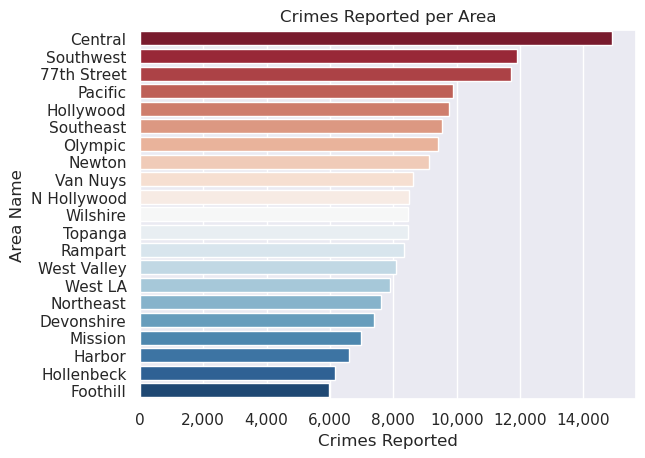

In [40]:
ax = sns.countplot(data=crimes, y='AREA_NAME',order=crimes['AREA_NAME'].value_counts().sort_values(ascending=False).index,palette='RdBu')
ax.set_title("Crimes Reported per Area")
ax.set_ylabel("Area Name")
ax.set_xlabel("Crimes Reported")
ax.set_xticklabels(["{:,.0f}".format(x) for x in plt.xticks()[0]]) 
plt.show()

In [41]:
crimes_areaname['count'].sort_values(ascending=False)
explosions = [0.2] + [0] * (len(crimes_areaname)-1)
cmap = plt.get_cmap('RdBu')
colors = cmap(np.linspace(0,1,len(crimes_areaname)))

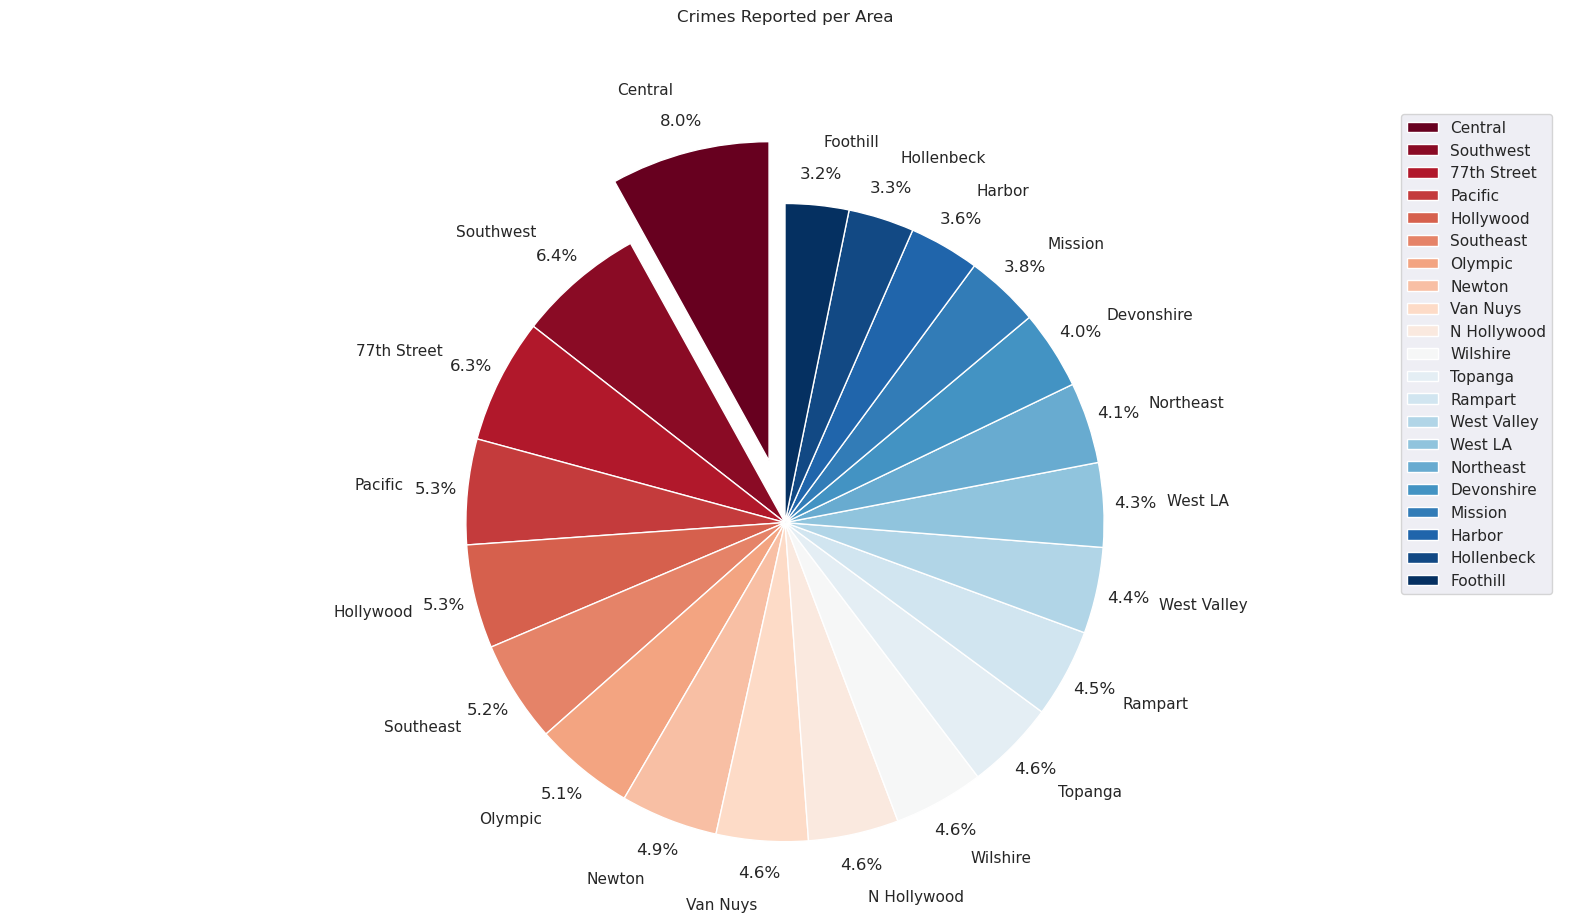

In [42]:
ax = crimes['AREA_NAME'].value_counts().plot(kind='pie',explode=explosions,figsize=(20,10),startangle=90, autopct='%1.1f%%',pctdistance=1.1,labeldistance=1.2,colors=colors)
ax.set_title("Crimes Reported per Area",y=1.1)
ax.set_ylabel('')
plt.axis('equal')
ax.legend(labels=crimes_areaname['AREA_NAME'].unique())
plt.show()

<hr style='margin-bottom:30px'>

> Crimes Reported by Gender

In [43]:
crimes.columns

Index(['DATE_RPTD', 'DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'CRM_CD_DESC',
       'VICT_AGE', 'VICT_SEX', 'VICT_DESCENT', 'WEAPON_DESC', 'STATUS_DESC',
       'LOCATION'],
      dtype='object')

/tmp/ipykernel_18005/859927424.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels("{:,.0f}".format(x) for x in plt.yticks()[0])


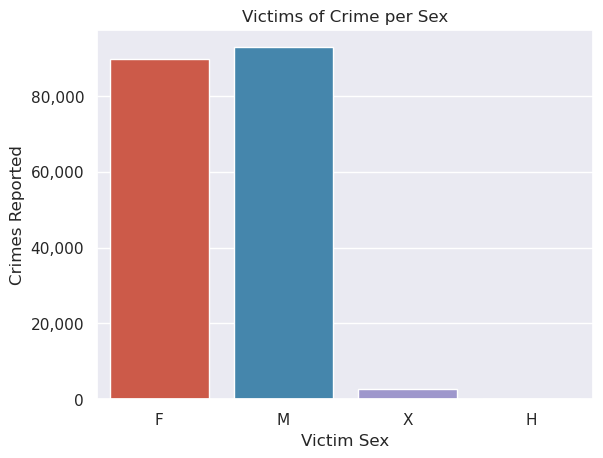

In [44]:
ax = sns.countplot(data=crimes, x='VICT_SEX')
ax.set_yticklabels("{:,.0f}".format(x) for x in plt.yticks()[0])
ax.set_title("Victims of Crime per Sex")
ax.set_ylabel("Crimes Reported")
ax.set_xlabel("Victim Sex")
plt.show()

In [45]:
crimes['VICT_SEX'].unique()

array(['F', 'M', 'X', 'H', nan], dtype=object)

<hr style='margin-bottom:30px'>

> Crimes Against Different Age Groups

In [46]:
crimes['VICT_AGE'].unique()

array([27, 60, 28, 37, 79, 33, 35, 72, 21, 22, 59, 78, 52, 56, 26, 39, 63,
       34, 50, 68, 12, 15, 48, 32, 53, 80, 25, 47, 43, 19, 23, 58, 38, 30,
       70, 54, 61, 46, 87, 24, 55, 31, 64, 45, 11, 83, 65, 42, 76, 51, 71,
       36, 29, 41, 73, 74, 10, 44, 77,  6, 84, 86,  9, 20, 49, 40,  7,  5,
       62, 75, 66,  8, 16, 67, 14, 17, 18, 85, 57, 13, 90,  2,  3, 81,  4,
       69, 89, 98, 93, 82, 88, 95, 91, 99, 96, 92, 97, 94])

In [47]:
crimes['VICT_AGE'].dtype

dtype('int64')

In [48]:
np.arange(0,100,10)

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [49]:
labels = ["0-17","18-25","26-34", "35-44", "45-54", "55-64", "65+"]
bins = [0,17,25,34,44,54,64,crimes['VICT_AGE'].max()]

In [50]:
crimes['AGE_GROUP'] = pd.cut(crimes['VICT_AGE'], labels=labels,bins=bins)

In [51]:
crimes[['VICT_AGE','AGE_GROUP']]

,VICT_AGE,AGE_GROUP
DR_NO,,
220314085,27,26-34
222013040,60,55-64
220614831,28,26-34
231207725,37,35-44
220213256,79,65+
...,...,...
231510379,25,18-25
231604807,23,18-25
231606525,25,18-25


In [52]:
victim_ages = crimes['AGE_GROUP'].value_counts(normalize=True)
victim_ages

AGE_GROUP
26-34   0.26
35-44   0.23
45-54   0.15
18-25   0.15
55-64   0.11
65+     0.08
0-17    0.02
Name: proportion, dtype: float64

/home/abdallah/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/tmp/ipykernel_18005/2099507595.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels("{:,.0f}".format(x) for x in plt.yticks()[0])


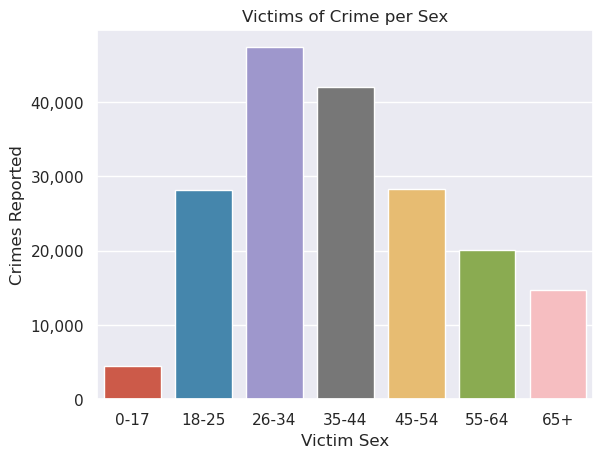

In [53]:
ax = sns.countplot(data=crimes, x='AGE_GROUP')
ax.set_yticklabels("{:,.0f}".format(x) for x in plt.yticks()[0])
ax.set_title("Victims of Crime per Sex")
ax.set_ylabel("Crimes Reported")
ax.set_xlabel("Victim Sex")
plt.show()

<hr style='margin-bottom:30px'>

> Peak Crime Hours

In [54]:
crimes.head()

,DATE_RPTD,DATE_OCC,TIME_OCC,AREA_NAME,CRM_CD_DESC,VICT_AGE,VICT_SEX,VICT_DESCENT,WEAPON_DESC,STATUS_DESC,LOCATION,AGE_GROUP
DR_NO,,,,,,,,,,,,
220314085,2022-07-22,2020-05-12,11:10:00,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,26-34
222013040,2022-08-06,2020-06-04,16:20:00,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,55-64
220614831,2022-08-18,2020-08-17,12:00:00,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,26-34
231207725,2023-02-27,2020-01-27,06:35:00,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,35-44
220213256,2022-07-14,2020-07-14,09:00:00,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,65+


In [55]:
crimes['TIME_OCC'].value_counts()

TIME_OCC
12:00:00    6453
18:00:00    3981
20:00:00    3760
17:00:00    3747
00:01:00    3580
            ... 
23:32:00       4
05:11:00       3
05:28:00       3
22:59:00       3
05:31:00       3
Name: count, Length: 1439, dtype: int64

In [56]:
crimes['TIME_OCC']

DR_NO
220314085    11:10:00
222013040    16:20:00
220614831    12:00:00
231207725    06:35:00
220213256    09:00:00
               ...   
231510379    11:00:00
231604807    18:00:00
231606525    10:00:00
231210064    16:30:00
230906458    09:00:00
Name: TIME_OCC, Length: 185349, dtype: object

In [57]:
time = pd.to_datetime(crimes['TIME_OCC'],format="%H:%M:%S")
hours = time.dt.hour
hours

DR_NO
220314085    11
222013040    16
220614831    12
231207725     6
220213256     9
             ..
231510379    11
231604807    18
231606525    10
231210064    16
230906458     9
Name: TIME_OCC, Length: 185349, dtype: int32

In [58]:
x_ticks = list(np.arange(hours.min(), hours.max()+1,1))
x_ticks

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

/home/abdallah/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


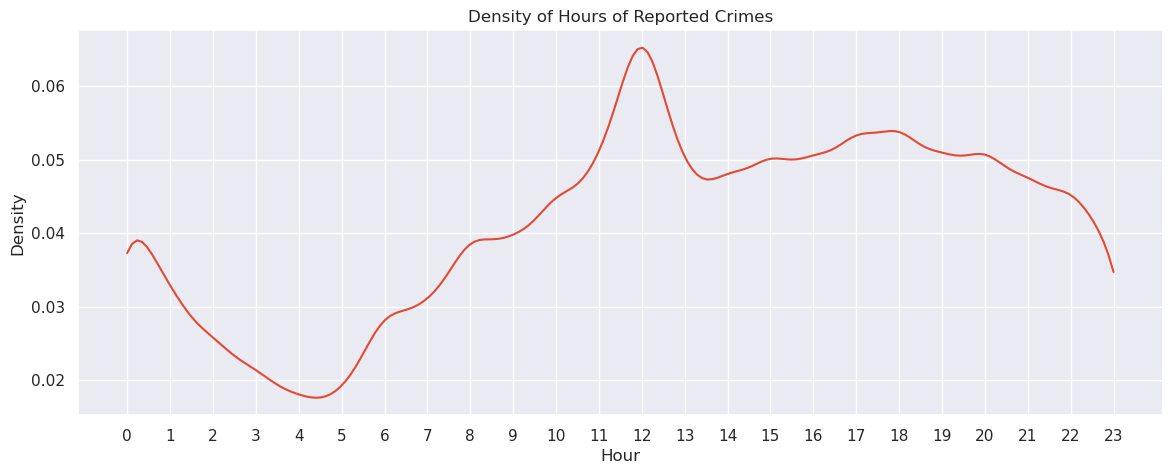

In [59]:
plt.figure(figsize=(14,5))
ax = sns.kdeplot(data=hours, cut=0)
ax.set_xlabel("Hour")
ax.set_title("Density of Hours of Reported Crimes")
ax.set_xticks(x_ticks)
plt.show()

In [60]:
peak_crime_hour = 12

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Step 3: Feature Relationship
(Multivariate Analysis)

In [76]:
crimes.columns

Index(['DATE_RPTD', 'DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'CRM_CD_DESC',
       'VICT_AGE', 'VICT_SEX', 'VICT_DESCENT', 'WEAPON_DESC', 'STATUS_DESC',
       'LOCATION', 'AGE_GROUP'],
      dtype='object')

In [77]:
crimes.head()

,DATE_RPTD,DATE_OCC,TIME_OCC,AREA_NAME,CRM_CD_DESC,VICT_AGE,VICT_SEX,VICT_DESCENT,WEAPON_DESC,STATUS_DESC,LOCATION,AGE_GROUP
DR_NO,,,,,,,,,,,,
220314085,2022-07-22,2020-05-12,11:10:00,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,26-34
222013040,2022-08-06,2020-06-04,16:20:00,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,55-64
220614831,2022-08-18,2020-08-17,12:00:00,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,26-34
231207725,2023-02-27,2020-01-27,06:35:00,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,35-44
220213256,2022-07-14,2020-07-14,09:00:00,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,65+


In [78]:
num_cols = crimes.select_dtypes('number').columns
num_crimes = crimes[num_cols]
num_crimes

,VICT_AGE
DR_NO,
220314085,27
222013040,60
220614831,28
231207725,37
220213256,79
...,...
231510379,25
231604807,23
231606525,25


In [79]:
diff_between_reportedandoccured = crimes['DATE_RPTD'] - crimes['DATE_OCC']

In [80]:
diff_between_reportedandoccured

DR_NO
220314085    801 days
222013040    793 days
220614831    731 days
231207725   1127 days
220213256    730 days
               ...   
231510379      4 days
231604807      1 days
231606525      0 days
231210064      0 days
230906458      0 days
Length: 185349, dtype: timedelta64[ns]

In [81]:
diff_between_reportedandoccured = diff_between_reportedandoccured.astype(str)

In [82]:
diff_between_reportedandoccured = diff_between_reportedandoccured.apply(lambda x: x.split(" ")[0])
diff_between_reportedandoccured = diff_between_reportedandoccured.astype(int)

In [83]:
diff_between_reportedandoccured

DR_NO
220314085     801
222013040     793
220614831     731
231207725    1127
220213256     730
             ... 
231510379       4
231604807       1
231606525       0
231210064       0
230906458       0
Length: 185349, dtype: int64

In [87]:
num_crimes['DIFF_RPTD_OCC'] = diff_between_reportedandoccured

/tmp/ipykernel_18005/709927835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_crimes['DIFF_RPTD_OCC'] = diff_between_reportedandoccured


In [88]:
num_crimes

,VICT_AGE,DIFF_RPTD_OCC
DR_NO,,
220314085,27,801
222013040,60,793
220614831,28,731
231207725,37,1127
220213256,79,730
...,...,...
231510379,25,4
231604807,23,1
231606525,25,0


In [89]:
num_crimes['HOUR'] = pd.to_datetime(crimes['TIME_OCC'],format="%H:%M:%S").dt.hour.astype(int)
num_crimes

/tmp/ipykernel_18005/542518451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_crimes['HOUR'] = pd.to_datetime(crimes['TIME_OCC'],format="%H:%M:%S").dt.hour.astype(int)


,VICT_AGE,DIFF_RPTD_OCC,HOUR
DR_NO,,,
220314085,27,801,11
222013040,60,793,16
220614831,28,731,12
231207725,37,1127,6
220213256,79,730,9
...,...,...,...
231510379,25,4,11
231604807,23,1,18
231606525,25,0,10


In [103]:
len(crimes['AREA_NAME'].unique())

21

In [109]:
area_dict = {i:x+1 for x,i in enumerate(crimes['AREA_NAME'].unique())}

In [110]:
area_dict

{'Southwest': 1,
 'Olympic': 2,
 'Hollywood': 3,
 '77th Street': 4,
 'Rampart': 5,
 'N Hollywood': 6,
 'Mission': 7,
 'Devonshire': 8,
 'Central': 9,
 'Wilshire': 10,
 'Newton': 11,
 'Northeast': 12,
 'Van Nuys': 13,
 'Hollenbeck': 14,
 'West Valley': 15,
 'Foothill': 16,
 'Topanga': 17,
 'Southeast': 18,
 'Pacific': 19,
 'West LA': 20,
 'Harbor': 21}

In [111]:
num_crimes['AREA_CODE'] = crimes['AREA_NAME'].map(area_dict)

/tmp/ipykernel_18005/3918375475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_crimes['AREA_CODE'] = crimes['AREA_NAME'].map(area_dict)


In [112]:
num_crimes

,VICT_AGE,DIFF_RPTD_OCC,HOUR,AREA_CODE
DR_NO,,,,
220314085,27,801,11,1
222013040,60,793,16,2
220614831,28,731,12,3
231207725,37,1127,6,4
220213256,79,730,9,5
...,...,...,...,...
231510379,25,4,11,6
231604807,23,1,18,16
231606525,25,0,10,16


In [116]:
crime_dict = {i:x+1 for x,i in enumerate(crimes['CRM_CD_DESC'].unique())} 

In [117]:
crime_dict

{'THEFT OF IDENTITY': 1,
 'BURGLARY': 2,
 'OTHER MISCELLANEOUS CRIME': 3,
 'THEFT PLAIN - PETTY ($950 & UNDER)': 4,
 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)': 5,
 'DOCUMENT FORGERY / STOLEN FELONY': 6,
 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)': 7,
 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE': 8,
 'ORAL COPULATION': 9,
 'BUNCO, GRAND THEFT': 10,
 'INTIMATE PARTNER - SIMPLE ASSAULT': 11,
 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)': 12,
 'TRESPASSING': 13,
 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD': 14,
 'VIOLATION OF RESTRAINING ORDER': 15,
 'BURGLARY FROM VEHICLE': 16,
 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)': 17,
 'THREATENING PHONE CALLS/LETTERS': 18,
 'INTIMATE PARTNER - AGGRAVATED ASSAULT': 19,
 'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)': 20,
 'VIOLATION OF COURT ORDER': 21,
 'BATTERY - SIMPLE ASSAULT': 22,
 'CREDIT CARDS, FRAUD USE ($950 & UNDER': 23,
 'DISTURBING THE PEACE': 24,
 'CONTEMPT OF COURT': 25,
 'PICKPOC

In [118]:
num_crimes['CRIME_CODE'] = crimes['CRM_CD_DESC'].map(crime_dict)

/tmp/ipykernel_18005/2605322102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_crimes['CRIME_CODE'] = crimes['CRM_CD_DESC'].map(crime_dict)


In [119]:
num_crimes

,VICT_AGE,DIFF_RPTD_OCC,HOUR,AREA_CODE,CRIME_CODE
DR_NO,,,,,
220314085,27,801,11,1,1
222013040,60,793,16,2,1
220614831,28,731,12,3,1
231207725,37,1127,6,4,1
220213256,79,730,9,5,1
...,...,...,...,...,...
231510379,25,4,11,6,10
231604807,23,1,18,16,7
231606525,25,0,10,16,41


In [120]:
num_crimes.isna().sum()

VICT_AGE         0
DIFF_RPTD_OCC    0
HOUR             0
AREA_CODE        0
CRIME_CODE       0
dtype: int64

In [124]:
corr = num_crimes.corr()
corr

,VICT_AGE,DIFF_RPTD_OCC,HOUR,AREA_CODE,CRIME_CODE
VICT_AGE,1.00,0.01,-0.01,0.08,-0.07
DIFF_RPTD_OCC,0.01,1.00,-0.04,0.00,-0.11
HOUR,-0.01,-0.04,1.00,0.01,0.09
AREA_CODE,0.08,0.00,0.01,1.00,-0.05
CRIME_CODE,-0.07,-0.11,0.09,-0.05,1.00


In [131]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

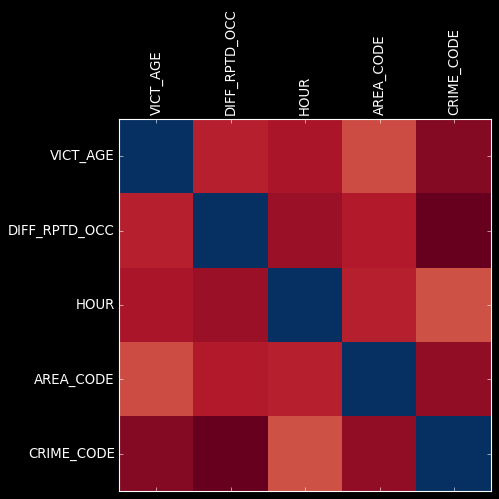

In [133]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(14,6))
plt.matshow(corr, cmap='RdBu',fignum=fig.number)
plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical');
plt.yticks(range(len(corr.columns)),corr.columns);

In [134]:
num_crimes.dtypes

VICT_AGE         int64
DIFF_RPTD_OCC    int64
HOUR             int64
AREA_CODE        int64
CRIME_CODE       int64
dtype: object

<hr style='margin-bottom: 30px'>

In [137]:
hours.unique()

array([11, 16, 12,  6,  9, 10, 13,  0, 17,  1, 21,  7, 15,  5, 18, 19, 23,
       14,  8, 20,  2, 22,  4,  3], dtype=int32)

In [138]:
crimes.columns

Index(['DATE_RPTD', 'DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'CRM_CD_DESC',
       'VICT_AGE', 'VICT_SEX', 'VICT_DESCENT', 'WEAPON_DESC', 'STATUS_DESC',
       'LOCATION', 'AGE_GROUP'],
      dtype='object')

In [139]:
hours.shape[0]

185349

In [140]:
crimes.shape[0]

185349

In [141]:
crimes['HOURS'] = hours
crimes

,DATE_RPTD,DATE_OCC,TIME_OCC,AREA_NAME,CRM_CD_DESC,VICT_AGE,VICT_SEX,VICT_DESCENT,WEAPON_DESC,STATUS_DESC,LOCATION,AGE_GROUP,HOURS
DR_NO,,,,,,,,,,,,,
220314085,2022-07-22,2020-05-12,11:10:00,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,26-34,11
222013040,2022-08-06,2020-06-04,16:20:00,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,55-64,16
220614831,2022-08-18,2020-08-17,12:00:00,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,26-34,12
231207725,2023-02-27,2020-01-27,06:35:00,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,35-44,6
220213256,2022-07-14,2020-07-14,09:00:00,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,65+,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231510379,2023-05-29,2023-05-25,11:00:00,N Hollywood,"BUNCO, GRAND THEFT",25,M,W,NaN,Invest Cont,5300 DENNY AV,18-25,11
231604807,2023-01-27,2023-01-26,18:00:00,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,NaN,Invest Cont,12500 BRANFORD ST,18-25,18
231606525,2023-03-22,2023-03-22,10:00:00,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,12800 FILMORE ST,18-25,10


In [142]:
[i for i in range(5)] 

[0, 1, 2, 3, 4]

In [143]:
[22,23]+[i for i in range(5)]

[22, 23, 0, 1, 2, 3, 4]

> Crimes Commited at Night

In [150]:
night_crimes = crimes.loc[crimes['HOURS'].isin([22,23]+[i for i in range(5)])]

In [151]:
night_crimes

,DATE_RPTD,DATE_OCC,TIME_OCC,AREA_NAME,CRM_CD_DESC,VICT_AGE,VICT_SEX,VICT_DESCENT,WEAPON_DESC,STATUS_DESC,LOCATION,AGE_GROUP,HOURS
DR_NO,,,,,,,,,,,,,
231207476,2023-02-27,2020-08-15,00:01:00,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV,65+,0
221711184,2022-06-15,2020-05-15,01:55:00,Devonshire,THEFT OF IDENTITY,27,M,B,NaN,Invest Cont,8300 WHITE OAK AV,26-34,1
221314362,2022-07-11,2020-04-07,00:01:00,Newton,THEFT OF IDENTITY,53,F,H,NaN,Invest Cont,1600 E OLYMPIC BL,45-54,0
231307252,2023-03-03,2020-07-05,23:05:00,Newton,THEFT OF IDENTITY,22,F,B,NaN,Invest Cont,6600 S BROADWAY,18-25,23
221614254,2022-11-13,2020-01-01,00:01:00,Foothill,THEFT OF IDENTITY,22,F,H,NaN,Invest Cont,10200 TELFAIR AV,18-25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231306158,2023-02-11,2023-02-08,22:00:00,Newton,BURGLARY FROM VEHICLE,38,M,H,NaN,Invest Cont,1700 E 16TH ST,35-44,22
231212224,2023-05-17,2023-05-17,23:00:00,77th Street,VIOLATION OF RESTRAINING ORDER,35,F,H,NaN,Invest Cont,8200 S MAIN ST,35-44,23
231300825,2023-06-07,2023-06-07,22:03:00,Newton,BATTERY - SIMPLE ASSAULT,45,F,B,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,2300 WALL ST,45-54,22


In [152]:
night_crimes['AREA_NAME'].value_counts(normalize=True)

AREA_NAME
Central       0.08
Hollywood     0.07
77th Street   0.07
Southwest     0.06
Southeast     0.06
Olympic       0.05
Newton        0.05
Pacific       0.05
N Hollywood   0.05
Rampart       0.05
Wilshire      0.04
Van Nuys      0.04
Northeast     0.04
West Valley   0.04
Topanga       0.04
Mission       0.04
West LA       0.04
Harbor        0.04
Devonshire    0.03
Hollenbeck    0.03
Foothill      0.03
Name: proportion, dtype: float64

In [158]:
peak_night_crime_location = 'Central'
peak_night_crime_location

'Central'

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)